<a href="https://colab.research.google.com/github/nicholascfp/DSBD/blob/main/Notebooks/Tarefa_5_2_N%C3%ADcholas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

---
## Tarefa 5.1 - Pré-processamento de um conjunto de dados

A presente tarefa tem como objetivo realizar o pré-processamento do conjunto de dados "Churn_Modelling_2.csv" de modo que ele fique perfeitamente adequado para aplicarmos um dos modelos de Aprendizado de Máquina que estudaremos adiante.

O conjunto de dados "Churn_Modelling_2.csv" contém detalhes dos clientes de um banco com uma variável de destino binária ("Exited") que reflete o fato de o cliente ter deixado o banco (encerrado sua conta) ou não.

Você deve construir um notebook para realizar os procedimentos abaixo sobre o conjunto de dados em questão. Tais procedimentos abordam a leitura do arquivo disponível no repositório GitHub da disciplina, seleção de variáveis, codificação de variáveis categóricas (strings), escalonamento de dados e separação de conjuntos de dados de treino e de teste.

Abra um novo notebook e implemente os seguintes passos:

1. Faça a leitura do arquivo "Churn_Modelling_2.csv (Links para um site externo.)" disponível na pasta "Churn (Links para um site externo.)" no repositório GitHub da disciplina (Links para um site externo.) e armazene numa variável como um dataframe;

2. Elimine instâncias (linhas) com dados ausentes para a variável "IsActiveMember".

3. Faça a imputação dos dados ausentes para a variável "NumOfProducts" utilizando a média da variável.

4. Crie uma variável (array) X que contenha os valores apenas dos atributos/colunas de "CreditScore" a "EstimatedSalary" utilizando a função "iloc" do Pandas. Em outras palavras, crie uma variável X que receba o dataframe inteiro exceto as 3 primeiras colunas e a última. Observe que as 3 primeiras colunas "RowNumber", "CustomerId" e "Surname" não são importantes e devem ser descartadas. E a última coluna ("Exited") será a variável destino ("target" ou saída) que será criada no próximo passo;

5. Crie uma variável (array) y que contenha apenas a última coluna  ("Exited"). Esta é a variável destino ("target" ou saída);

6. Codifique a coluna/variável categórica "Geography" como numérica utilizando a classe LabelEncoder da biblioteca scikit-learn;

7. Codifique a coluna/variável categórica "Gender" como numérica utilizando a classe LabelEncoder da biblioteca scikit-learn;

8. Após executar o passo 6, transforme os dados da variável "Geography" para a forma binária utilizando a classe OneHotEncoder da biblioteca scikit-learn eliminando redundância, ou seja, aplicando a codificação de variáveis dummy. Observe que há apenas 3 países (categorias) diferentes. Atenção: esse talvez seja o passo mais difícil da tarefa. Você deve transformar o resultado da variável/coluna "Geography" obtido no passo 4 para o formato binário (one-hot) de modo que fique representado por apenas duas colunas (de 0s e 1s). Além disso, essas duas novas colunas devem permanecer na mesma variável X. Dica: verifique a utilização da função make_column_transformer (Links para um site externo.) da biblioteca scikit-learn;

9. Divida as variáveis X e y em dados de treino e de teste utilizando o método "train_test_split", gerando as variáveis X_train, X_test, y_train e y_test. Você define a proporção de dados de treino e de teste;

10. Faça a padronização (escalonamento) dos dados das variáveis X_train e X_test utilizando a classe StandardScaler do scikit-learn;

11. Execute todo o código e submeta o arquivo do notebook aqui na tarefa.

---



---

#Tarefa 5.2 - Aplicação de diferentes algoritmos de AM numa tarefa de predição (classificação) Churn - Churn_Modelling


A presente tarefa consiste em aplicar diferentes algoritmos de AM para prever (classificar) quando um cliente irá parar de utilizar o serviço de um banco utilizando a base de dados "Churn_Modelling_2.csv (Links para um site externo.)" disponível na pasta "Churn (Links para um site externo.)" no repositório GitHub da disciplina (Links para um site externo.).

Trata-se de um problema de classificação binária.

A saída de um modelo de churn preditivo é uma medida do risco imediato ou futuro de cancelamento de um cliente com base no seu perfil.

Conjunto de dados (características):

Número de Instâncias: 10.000

Número de Atributos: 13 atributos (incluindo o target)

Informações dos Atributos:

RowNumber
CustomerId
Surname
CreditScore
Geography
Gender Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited (variável de destino - target)
Observações:



1-) Os dados devem ser pré-processados (recuperar o que foi feito na Tarefa 5.1;

2-) Divida o conjunto de dados em treino (75%) e teste (25%);

3-)  Você deve aplicar os seguintes algoritmos de AM: 
- Regressão Logística
- KNN - K-Nearest Neighbors (k-vizinhos mais próximos)
- SVM - Support Vector Machines (Máquinas de Vetores de Suporte)
- Random Forest 

4-) Mostrar a taxa de acerto e a matriz de confusão de cada algoritmo de AM.

---


---

# Tarefa 5.1 - Pré-processamento de um conjunto de dados

### 1. Faça a leitura do arquivo "Churn_Modelling_2.csv (Links para um site externo.)" disponível na pasta "Churn (Links para um site externo.)" no repositório GitHub da disciplina (Links para um site externo.) e armazene numa variável como um dataframe;

In [206]:
!git clone "https://github.com/malegopc/DSBD"

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# Read Data Files
churn = pd.read_csv('/content/DSBD/Datasets/Churn/Churn_Modelling_2.csv')
# Eliminate null lines
#churn = churn.dropna()
# Show Data
churn

fatal: destination path 'DSBD' already exists and is not an empty directory.


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1.0,1,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1.0,0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3.0,1,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2.0,0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1.0,1,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2.0,1,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1.0,1,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1.0,0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2.0,1,0.0,92888.52,1


In [207]:
# Dataset Length
print('Dataset Length:')
n = len(churn)
print(n)
# Show non-null Data Numbers
print('\nData Info:\n')
churn.info()
# Null Data Numbers Sum
print('\nNull Data Numbers Sum:\n')
churn.isnull().sum()

Dataset Length:
10000

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    9990 non-null   float64
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   9986 non-null   float64
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB

Null Data Numbers Sum:



RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts      10
HasCrCard           0
IsActiveMember     14
EstimatedSalary     0
Exited              0
dtype: int64

### 3. Faça a imputação dos dados ausentes para a variável "NumOfProducts" utilizando a média da variável.

In [208]:
churn2 = churn.copy()
column_mean = churn2['NumOfProducts'].mean()
churn2['NumOfProducts'] = churn2['NumOfProducts'].fillna(value = column_mean)

# strategy: mean, median, most_frequent, constant
# imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
# housing3[['total_bedrooms']] = imputer.fit_transform(housing3[['total_bedrooms']].values)

In [209]:
# Soma o número de dados null (ausentes)
print('\n\nSoma de dados null (vazios):\n')
churn2.isnull().sum()



Soma de dados null (vazios):



RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember     14
EstimatedSalary     0
Exited              0
dtype: int64

### 2. Elimine instâncias (linhas) com dados ausentes para a variável "IsActiveMember".

In [210]:
# Exclui as instâncias (linhas) com dados ausentes:
churn2 = churn2.dropna(subset = ['IsActiveMember'], inplace = False)

In [211]:
# Show non-null Data Numbers
print('\nData Info:\n')
churn2.info()
# Null Data Numbers Sum
print('\nNull Data Numbers Sum:\n')
churn2.isnull().sum()


Data Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9986 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9986 non-null   int64  
 1   CustomerId       9986 non-null   int64  
 2   Surname          9986 non-null   object 
 3   CreditScore      9986 non-null   int64  
 4   Geography        9986 non-null   object 
 5   Gender           9986 non-null   object 
 6   Age              9986 non-null   int64  
 7   Tenure           9986 non-null   int64  
 8   Balance          9986 non-null   float64
 9   NumOfProducts    9986 non-null   float64
 10  HasCrCard        9986 non-null   int64  
 11  IsActiveMember   9986 non-null   float64
 12  EstimatedSalary  9986 non-null   float64
 13  Exited           9986 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB

Null Data Numbers Sum:



RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 4. Crie uma variável (array) X que contenha os valores apenas dos atributos/colunas de "CreditScore" a "EstimatedSalary" utilizando a função "iloc" do Pandas. Em outras palavras, crie uma variável X que receba o dataframe inteiro exceto as 3 primeiras colunas e a última. Observe que as 3 primeiras colunas "RowNumber", "CustomerId" e "Surname" não são importantes e devem ser descartadas. E a última coluna ("Exited") será a variável destino ("target" ou saída) que será criada no próximo passo;

In [212]:
X = churn2.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1 , inplace = True)
X = churn2.iloc[:,0:10].values
X

array([[619, 'France', 'Female', ..., 1, 1.0, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1.0, 112542.58],
       [502, 'France', 'Female', ..., 1, 0.0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1.0, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0.0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0.0, 38190.78]], dtype=object)

### 5. Crie uma variável (array) y que contenha apenas a última coluna ("Exited"). Esta é a variável destino ("target" ou saída);

In [213]:
y = churn2.iloc[:,10].values
y

array([1, 0, 1, ..., 1, 1, 0])

### 6. Codifique a coluna/variável categórica "Geography" como numérica utilizando a classe LabelEncoder da biblioteca scikit-learn;

In [214]:
country = churn2['Geography'] #variável categórica
le = LabelEncoder() # cria objeto
le.fit(country) # ajusta na variável de entrada
country_encoder = le.transform(country) # aplica a transformação na variável de entrada
churn2['Geography'] = country_encoder # France = 0 / Germany = 1 / Spain = 2
churn2

# le = LabelEncoder()
# le.fit(X[:,1])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,Female,42,2,0.00,1.0,1,1.0,101348.88,1
1,608,2,Female,41,1,83807.86,1.0,0,1.0,112542.58,0
2,502,0,Female,42,8,159660.80,3.0,1,0.0,113931.57,1
3,699,0,Female,39,1,0.00,2.0,0,0.0,93826.63,0
4,850,2,Female,43,2,125510.82,1.0,1,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,Male,39,5,0.00,2.0,1,0.0,96270.64,0
9996,516,0,Male,35,10,57369.61,1.0,1,1.0,101699.77,0
9997,709,0,Female,36,7,0.00,1.0,0,1.0,42085.58,1
9998,772,1,Male,42,3,75075.31,2.0,1,0.0,92888.52,1


### 7. Codifique a coluna/variável categórica "Gender" como numérica utilizando a classe LabelEncoder da biblioteca scikit-learn;

In [215]:
gender = churn2['Gender'] #variável categórica
le = LabelEncoder() # cria objeto
le.fit(gender) # ajusta na variável de entrada
gender_encoder = le.transform(gender) # aplica a transformação na variável de entrada
churn2['Gender'] = gender_encoder # Female = 0 / Male = 1
churn2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1.0,1,1.0,101348.88,1
1,608,2,0,41,1,83807.86,1.0,0,1.0,112542.58,0
2,502,0,0,42,8,159660.80,3.0,1,0.0,113931.57,1
3,699,0,0,39,1,0.00,2.0,0,0.0,93826.63,0
4,850,2,0,43,2,125510.82,1.0,1,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2.0,1,0.0,96270.64,0
9996,516,0,1,35,10,57369.61,1.0,1,1.0,101699.77,0
9997,709,0,0,36,7,0.00,1.0,0,1.0,42085.58,1
9998,772,1,1,42,3,75075.31,2.0,1,0.0,92888.52,1


### 8. Após executar o passo 6, transforme os dados da variável "Geography" para a forma binária utilizando a classe OneHotEncoder da biblioteca scikit-learn eliminando redundância, ou seja, aplicando a codificação de variáveis dummy. Observe que há apenas 3 países (categorias) diferentes. Atenção: esse talvez seja o passo mais difícil da tarefa. Você deve transformar o resultado da variável/coluna "Geography" obtido no passo 6 para o formato binário (one-hot) de modo que fique representado por apenas duas colunas (de 0s e 1s). Além disso, essas duas novas colunas devem permanecer na mesma variável X. Dica: verifique a utilização da função make_column_transformer (Links para um site externo.) da biblioteca scikit-learn;

In [216]:
ohe = OneHotEncoder(drop = 'first')

ct = make_column_transformer(
    (ohe, [1,2]), # 1 = Geography, 2 = Gender
    remainder = 'passthrough')

X = ct.fit_transform(X)
print(X[:,0:11])

#enc = OneHotEncoder(drop = 'first', sparse = False)
# ct = make_column_transformer((enc,[1]),(enc[2]), ramainder = 'passthrough')

[[0.0 0.0 0.0 ... 1 1.0 101348.88]
 [0.0 1.0 0.0 ... 0 1.0 112542.58]
 [0.0 0.0 0.0 ... 1 0.0 113931.57]
 ...
 [0.0 0.0 0.0 ... 0 1.0 42085.58]
 [1.0 0.0 1.0 ... 1 0.0 92888.52]
 [0.0 0.0 0.0 ... 1 0.0 38190.78]]


### 9. Divida as variáveis X e y em dados de treino e de teste utilizando o método "train_test_split", gerando as variáveis X_train, X_test, y_train e y_test. Você define a proporção de dados de treino e de teste;

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7489, 11), (2497, 11), (7489,), (2497,))

### 10. Faça a padronização (escalonamento) dos dados das variáveis X_train e X_test utilizando a classe StandardScaler do scikit-learn;

In [218]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train, X_test

(array([[ 1.72544606, -0.57174804, -1.10198466, ...,  0.64245802,
         -1.02968325,  1.36744416],
        [-0.57956028, -0.57174804,  0.90745365, ...,  0.64245802,
          0.97117245, -1.0562282 ],
        [-0.57956028,  1.74902218, -1.10198466, ...,  0.64245802,
         -1.02968325, -0.29006699],
        ...,
        [-0.57956028, -0.57174804, -1.10198466, ...,  0.64245802,
         -1.02968325,  1.5671056 ],
        [-0.57956028, -0.57174804, -1.10198466, ...,  0.64245802,
          0.97117245, -1.26181426],
        [-0.57956028, -0.57174804,  0.90745365, ...,  0.64245802,
          0.97117245,  1.56935246]]),
 array([[-0.57956028, -0.57174804,  0.90745365, ...,  0.64245802,
          0.97117245, -0.55722476],
        [ 1.72544606, -0.57174804,  0.90745365, ...,  0.64245802,
         -1.02968325,  1.58938629],
        [ 1.72544606, -0.57174804, -1.10198466, ...,  0.64245802,
         -1.02968325, -1.73763017],
        ...,
        [-0.57956028, -0.57174804,  0.90745365, ...,  

#Tarefa 5.2 - Aplicação de diferentes algoritmos de AM numa tarefa de predição (classificação) Churn - Churn_Modelling`

In [219]:
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

### 1. Os dados devem ser pré-processados (recuperar o que foi feito na Tarefa 5.1;

###2-) Divida o conjunto de dados em treino (75%) e teste (25%);


- Realizados na tarefa anterior (Tarefa 5-1)

### 3-)  Você deve aplicar os seguintes algoritmos de AM: 
- Regressão Logística
- KNN - K-Nearest Neighbors (k-vizinhos mais próximos)
- SVM - Support Vector Machines (Máquinas de Vetores de Suporte)
- Random Forest 

### 4-) Mostrar a taxa de acerto e a matriz de confusão de cada algoritmo de AM.

## - Regressão Logística

Taxa de acerto =  80.78 %

Matriz de confusão:



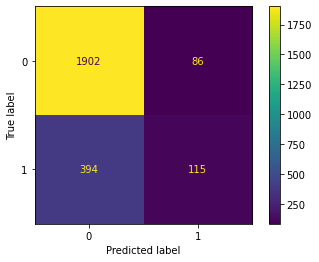

In [220]:
logreg = LogisticRegression(solver = 'liblinear') # liblinear => conjuntos pequenos
logreg.fit(X_train,y_train)
classificacoes_logreg = logreg.predict(X_test)
acertos_LogReg = metrics.accuracy_score(y_test,classificacoes_logreg)
print('Taxa de acerto = ',round(acertos_LogReg*100,2),"%\n")

# matriz de confusão
print('Matriz de confusão:\n')
cm_logreg = ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
#print(cm_logreg.confusion_matrix)
plt.show()

## - KNN - K-Nearest Neighbors (k-vizinhos mais próximos)

Taxa de acerto =  82.94 %

Matriz de confusão:



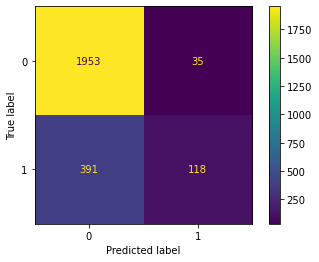

In [221]:
knn = KNeighborsClassifier(n_neighbors=20) 
knn.fit(X_train,y_train)
classificacoes_knn = knn.predict(X_test)
acertos_knn = metrics.accuracy_score(y_test,classificacoes_knn)
print('Taxa de acerto = ',round(acertos_knn*100,2),"%\n")

# matriz de confusão
print('Matriz de confusão:\n')
cm_knn = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
#print(cm_knn.confusion_matrix)
plt.show()

## - SVM - Support Vector Machines (Máquinas de Vetores de Suporte)

Taxa de acerto =  85.5 %

Matriz de confusão:



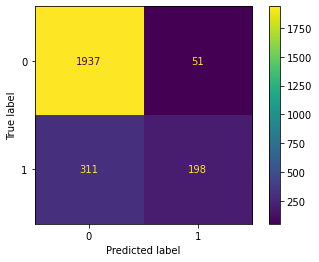

In [222]:
svm = svm.SVC()
svm.fit(X_train, y_train)
classificacoes_svm = svm.predict(X_test)
acertos_svm = metrics.accuracy_score(y_test, classificacoes_svm)
print('Taxa de acerto = ',round(acertos_svm*100,2),"%\n")

# matriz de confusão
print('Matriz de confusão:\n')
cm_svm = ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)
#print(cm_svm.confusion_matrix)
plt.show()

## - Random Forest



Taxa de acerto =  84.46 %

Matriz de confusão:



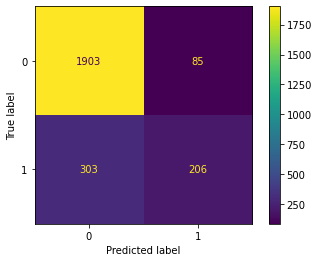

In [223]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf.fit(X_train, y_train)
classificacoes_rf = rf.predict(X_test)
acertos_rf = metrics.accuracy_score(y_test, classificacoes_rf)
print('Taxa de acerto = ',round(acertos_rf*100,2),"%\n")

# matriz de confusão
print('Matriz de confusão:\n')
cm_rf = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
#print(cm_rf.confusion_matrix)
plt.show()